In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble._hist_gradient_boosting.gradient_boosting import HistGradientBoostingRegressor
from sklearn.ensemble._hist_gradient_boosting.binning import _BinMapper

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
X_iris, y_iris = load_iris(return_X_y=True)

In [15]:
col_data = X_iris[:,1] 

ValueError: operands could not be broadcast together with shapes (150,) (2,) 

In [12]:
unique, counts = np.unique(col_data, return_counts=True)

In [13]:
unique

array([2. , 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3,
       3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.4])

In [14]:
counts

array([ 1,  3,  4,  3,  8,  5,  9, 14, 10, 26, 11, 13,  6, 12,  6,  4,  3,
        6,  2,  1,  1,  1,  1])

In [5]:
X_df = pd.DataFrame(X_iris)

In [63]:
max_bins = 10
percentiles = np.linspace(0, 100, num=max_bins + 1)
percentiles = percentiles[1:-1]
quantil = np.percentile(X_iris[:,0], q=percentiles, interpolation='midpoint')

In [68]:
quantil

array([4.8 , 5.  , 5.25, 5.6 , 5.8 , 6.1 , 6.3 , 6.55, 6.9 ])

In [69]:
X_df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [72]:
list(enumerate(sorted(list(X_iris[:,0]))))

[(0, 4.3),
 (1, 4.4),
 (2, 4.4),
 (3, 4.4),
 (4, 4.5),
 (5, 4.6),
 (6, 4.6),
 (7, 4.6),
 (8, 4.6),
 (9, 4.7),
 (10, 4.7),
 (11, 4.8),
 (12, 4.8),
 (13, 4.8),
 (14, 4.8),
 (15, 4.8),
 (16, 4.9),
 (17, 4.9),
 (18, 4.9),
 (19, 4.9),
 (20, 4.9),
 (21, 4.9),
 (22, 5.0),
 (23, 5.0),
 (24, 5.0),
 (25, 5.0),
 (26, 5.0),
 (27, 5.0),
 (28, 5.0),
 (29, 5.0),
 (30, 5.0),
 (31, 5.0),
 (32, 5.1),
 (33, 5.1),
 (34, 5.1),
 (35, 5.1),
 (36, 5.1),
 (37, 5.1),
 (38, 5.1),
 (39, 5.1),
 (40, 5.1),
 (41, 5.2),
 (42, 5.2),
 (43, 5.2),
 (44, 5.2),
 (45, 5.3),
 (46, 5.4),
 (47, 5.4),
 (48, 5.4),
 (49, 5.4),
 (50, 5.4),
 (51, 5.4),
 (52, 5.5),
 (53, 5.5),
 (54, 5.5),
 (55, 5.5),
 (56, 5.5),
 (57, 5.5),
 (58, 5.5),
 (59, 5.6),
 (60, 5.6),
 (61, 5.6),
 (62, 5.6),
 (63, 5.6),
 (64, 5.6),
 (65, 5.7),
 (66, 5.7),
 (67, 5.7),
 (68, 5.7),
 (69, 5.7),
 (70, 5.7),
 (71, 5.7),
 (72, 5.7),
 (73, 5.8),
 (74, 5.8),
 (75, 5.8),
 (76, 5.8),
 (77, 5.8),
 (78, 5.8),
 (79, 5.8),
 (80, 5.9),
 (81, 5.9),
 (82, 5.9),
 (83, 6.0),
 (

In [66]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

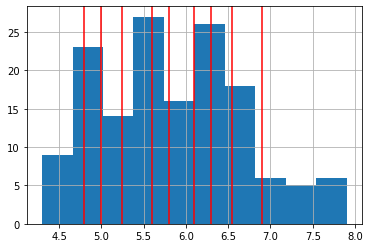

In [75]:
X_df[0].hist(bins=10)
for xc in quantil:
    plt.axvline(x=xc, color='red')
plt.show()

In [74]:
quantil

array([4.8 , 5.  , 5.25, 5.6 , 5.8 , 6.1 , 6.3 , 6.55, 6.9 ])

In [73]:
binned_data_df[0].value_counts()

3    24
1    23
5    22
0    22
6    20
2    20
4    19
Name: 0, dtype: int64

In [18]:
def _find_binning_thresholds(data, max_bins, subsample, random_state):
    """Extract feature-wise quantiles from numerical data.

    Missing values are ignored for finding the thresholds.

    Parameters
    ----------
    data : array-like, shape (n_samples, n_features)
        The data to bin.
    max_bins: int
        The maximum number of bins to use for non-missing values. If for a
        given feature the number of unique values is less than ``max_bins``,
        then those unique values will be used to compute the bin thresholds,
        instead of the quantiles.
    subsample : int or None
        If ``n_samples > subsample``, then ``sub_samples`` samples will be
        randomly choosen to compute the quantiles. If ``None``, the whole data
        is used.
    random_state: int or numpy.random.RandomState or None
        Pseudo-random number generator to control the random sub-sampling.
        See :term:`random_state`.

    Return
    ------
    binning_thresholds: list of arrays
        For each feature, stores the increasing numeric values that can
        be used to separate the bins. Thus ``len(binning_thresholds) ==
        n_features``.
    """

    binning_thresholds = []
    for f_idx in range(data.shape[1]):
        col_data = data[:, f_idx]
        # ignore missing values when computing bin thresholds
        missing_mask = np.isnan(col_data)
        if missing_mask.any():
            col_data = col_data[~missing_mask]
        col_data = np.ascontiguousarray(col_data, dtype=np.float64)
        distinct_values = np.unique(col_data)
        if len(distinct_values) <= max_bins:
            midpoints = distinct_values[:-1] + distinct_values[1:]
            midpoints *= .5
        else:
            # We sort again the data in this case. We could compute
            # approximate midpoint percentiles using the output of
            # np.unique(col_data, return_counts) instead but this is more
            # work and the performance benefit will be limited because we
            # work on a fixed-size subsample of the full data.
            percentiles = np.linspace(0, 100, num=max_bins + 1)
            percentiles = percentiles[1:-1]
            print(percentiles)
            midpoints = np.percentile(col_data, percentiles,
                                      interpolation='midpoint').astype(np.float64)
            assert midpoints.shape[0] == max_bins - 1

        # We avoid having +inf thresholds: +inf thresholds are only allowed in
        # a "split on nan" situation.
        np.clip(midpoints, a_min=None, a_max=1e300, out=midpoints)

        binning_thresholds.append(midpoints)

    return binning_thresholds

In [19]:
_find_binning_thresholds(X_iris, 3, None, None)

[33.33333333 66.66666667]
[33.33333333 66.66666667]
[33.33333333 66.66666667]
[33.33333333 66.66666667]


[array([5.4, 6.3]), array([2.9, 3.2]), array([2.45, 4.9 ]), array([0.8, 1.6])]

In [44]:
test_model = HistGradientBoostingRegressor(verbose=False, max_bins=7)

In [48]:
n_bins = test_model.max_bins + 1  # + 1 for missing values
test_model.bin_mapper_ = _BinMapper(n_bins=n_bins,
                                      random_state=None)
binned_data = test_model._bin_data(X_iris, True)

In [50]:
binned_data_df = pd.DataFrame(binned_data)

In [58]:
binned_data_df

,0,1,2,3
0,1,5,0,0
1,0,2,0,0
2,0,4,0,0
3,0,3,1,0
4,1,6,0,0
...,...,...,...,...
145,5,2,5,6
146,4,0,4,5
147,5,2,5,5
148,4,5,5,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8aa216240>,
      dtype=object)

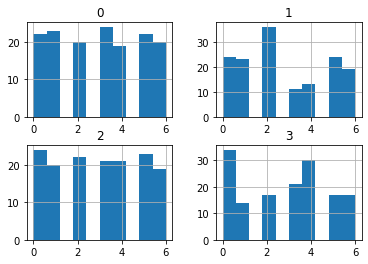

In [51]:
binned_data_df.hist()

In [55]:
binned_data_df[0].value_counts()

3    24
1    23
5    22
0    22
6    20
2    20
4    19
Name: 0, dtype: int64

In [56]:
binned_data_df[1].value_counts()

2    36
5    24
0    24
1    23
6    19
4    13
3    11
Name: 1, dtype: int64

In [57]:
binned_data_df[2].value_counts()

0    24
5    23
2    22
4    21
3    21
1    20
6    19
Name: 2, dtype: int64